          data             op   storage        size
0        4.949          write  dynamodb    0.003906
1        5.159          write  dynamodb    0.003906
2        5.236          write  dynamodb    0.003906
3        5.206          write  dynamodb    0.003906
4        5.516          write  dynamodb    0.003906
...        ...            ...       ...         ...
36031   71.349           read  dynamodb  399.951172
36032   14.440           read  dynamodb  399.951172
36033   13.752           read  dynamodb  399.951172
36034   14.564           read  dynamodb  399.951172
36035  100.000  read_capacity  dynamodb  399.951172

[36036 rows x 4 columns]


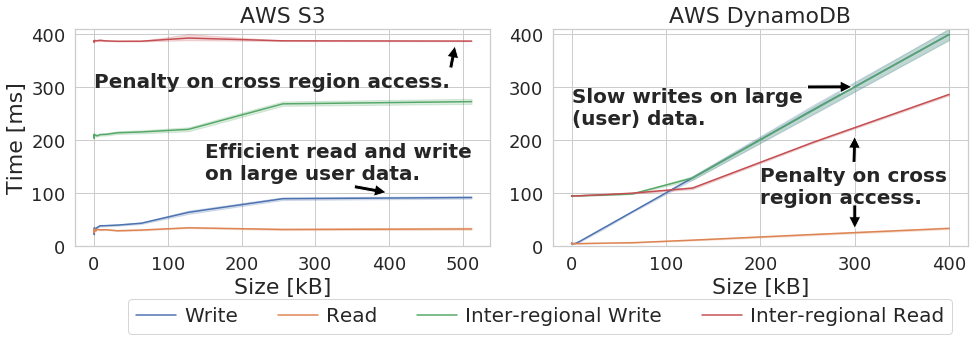

In [55]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import ticker
from scipy import stats
from os.path import join, pardir

DATA_DIR = join(pardir, pardir, 'data', 'microbenchmark_storage')

sns.set(rc={'figure.figsize':(16,4)})
sns.set_style("whitegrid")

fig, axes = plt.subplots(ncols=2)
plt.subplots_adjust(wspace=0.15)

# DynamoDB
df = pd.read_csv(join(DATA_DIR, 'intraregion_dynamodb.csv'), index_col=0)
df2 = pd.read_csv(join(DATA_DIR, 'interregion_dynamodb.csv'), index_col=0)
df['data'] /= 1000.0
df2['data'] /= 1000.0
df['size'] /= 1024.0
df2['size'] /= 1024.0
print(df)

sns.lineplot(data=df.loc[df['op'] == 'write'], x='size', y='data', ax=axes[1], label='Write')
sns.lineplot(data=df.loc[df['op'] == 'read'], x='size', y='data', ax=axes[1], label='Read')
sns.lineplot(data=df2.loc[df['op'] == 'write'], x='size', y='data', ax=axes[1], label='Inter-regional Write')
sns.lineplot(data=df2.loc[df['op'] == 'read'], x='size', y='data', ax=axes[1], label='Inter-regional Read')

# S3
df = pd.read_csv(join(DATA_DIR, 'intraregion_s3.csv'), index_col=0)
df2 = pd.read_csv(join(DATA_DIR, 'interregion_s3.csv'), index_col=0)
df['data'] /= 1000.0
df2['data'] /= 1000.0
df['size'] /= 1024.0
df2['size'] /= 1024.0

sns.lineplot(data=df.loc[df['op'] == 'write'], x='size', y='data', ax=axes[0])
sns.lineplot(data=df.loc[df['op'] == 'read'], x='size', y='data', ax=axes[0])
sns.lineplot(data=df2.loc[df['op'] == 'write'], x='size', y='data', ax=axes[0])
sns.lineplot(data=df2.loc[df['op'] == 'read'], x='size', y='data', ax=axes[0])


#locs = [2 ** i for i in range(2, 20)]
#axes[0].xaxis.set_major_locator(ticker.FixedLocator(locs))
#axes[0].xaxis.set_major_formatter(ticker.FormatStrFormatter("%.2f"))
axes[0].set_ylim(0, 410)
axes[1].set_ylim(0, 410)
axes[0].set_xlabel('Size [kB]',fontsize=22)
axes[1].set_xlabel('Size [kB]',fontsize=22)
axes[0].set_ylabel('Time [ms]',fontsize=22)
axes[0].set_title('AWS S3', fontsize=22)
axes[1].set_title('AWS DynamoDB', fontsize=22)
axes[0].tick_params(axis='x', labelsize=18)
axes[0].tick_params(axis='y', labelsize=18)
axes[1].tick_params(axis='x', labelsize=18)
axes[1].tick_params(axis='y', labelsize=18)
axes[1].set_ylabel('')

axes[1].annotate('Penalty on cross\nregion access.', xy=(300, 210),
            xytext=(200, 80), fontsize=20, fontweight='bold',
            arrowprops=dict(facecolor='black', shrink=0.05)
)
axes[1].annotate('', xy=(300, 30),
            xytext=(300, 80), fontsize=20, fontweight='bold',
            arrowprops=dict(facecolor='black', shrink=0.05)
)
axes[1].annotate('Slow writes on large\n(user) data.', xy=(300, 300),
            xytext=(0, 230), fontsize=20, fontweight='bold',
            arrowprops=dict(facecolor='black', shrink=0.05)
)

axes[0].annotate('Penalty on cross region access.', xy=(490, 380),
            xytext=(0, 300), fontsize=20, fontweight='bold',
            arrowprops=dict(facecolor='black', shrink=0.05),
            #ha='left'
)
axes[0].annotate('Efficient read and write\non large user data.', xy=(400, 100),
            xytext=(150, 125), fontsize=20, fontweight='bold',
            arrowprops=dict(facecolor='black', shrink=0.05)
)

handles, labels = axes[1].get_legend_handles_labels()
axes[1].legend(handles, labels, ncol=5, bbox_to_anchor=(-0.03, -0.45), loc='lower center', handletextpad=0.4, fontsize=20)


#ax.set_title('1M read (solid) and\nwrite (dotted) operations.', fontsize=22)
#axes[0].plot(,yrange,color='green',linestyle='solid', label='AWS S3', linewidth=4)

plt.savefig("performance_plot.pdf",bbox_inches='tight',pad_inches = 0, transparent=False)